# **Evaluating a model**

In [1]:
TEST_SET_FEATURES = "../01_data/test/under_educated_features.csv"
TEST_SET_LABELS = "../01_data/test/under_educated_labels.csv"

MODEL_NAME = "under_educated"

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import neural_network

/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3

## **Loading Test Data**

In [3]:
X = np.loadtxt(TEST_SET_FEATURES, delimiter=",")
y = np.loadtxt(TEST_SET_LABELS, delimiter=",").reshape((len(X), 1))

## **Loading the Model**

In [4]:
model = neural_network.create_model(X)

model.load_weights("../03_models/"+MODEL_NAME+"/")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## **Inference**

In [5]:
predictions = model.predict(X)

## **Evaluation**

In [6]:
def rescale_labels(original_labels, scaled_labels):
    #m = np.mean(original_labels)
    #s = np.std(original_labels)
    #return scaled_labels*s+m
    return scaled_labels*max(original_labels)

In [7]:
original_labels = pd.read_csv("../01_data/adult_reconstruction.csv")
original_labels = original_labels["income"]

In [8]:
rms = np.sqrt((y-predictions)**2)

In [9]:
rescaled_rms = rescale_labels(original_labels, rms)

(array([492., 342., 261., 225., 174., 124.,  88.,  76.,  72.,  39.,  37.,
         33.,  28.,  17.,  21.,  13.,  11.,   4.,   8.,   4.,   6.,   2.,
          0.,   1.,   1.,   0.,   0.,   0.,   2.,   1.]),
 array([2.61381492e+00, 2.62139496e+03, 5.24017611e+03, 7.85895726e+03,
        1.04777384e+04, 1.30965196e+04, 1.57153007e+04, 1.83340819e+04,
        2.09528630e+04, 2.35716442e+04, 2.61904253e+04, 2.88092065e+04,
        3.14279876e+04, 3.40467687e+04, 3.66655499e+04, 3.92843310e+04,
        4.19031122e+04, 4.45218933e+04, 4.71406745e+04, 4.97594556e+04,
        5.23782368e+04, 5.49970179e+04, 5.76157991e+04, 6.02345802e+04,
        6.28533614e+04, 6.54721425e+04, 6.80909237e+04, 7.07097048e+04,
        7.33284860e+04, 7.59472671e+04, 7.85660483e+04]),
 <BarContainer object of 30 artists>)

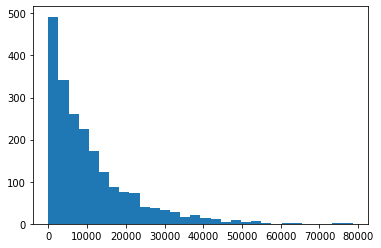

In [10]:
plt.hist(rescaled_rms, bins=30)

(array([412., 529., 397., 325., 243., 108.,  44.,  20.,   2.,   2.]),
 array([ -1112.80498209,   9191.31382185,  19495.4326258 ,  29799.55142974,
         40103.67023369,  50407.78903763,  60711.90784158,  71016.02664552,
         81320.14544947,  91624.26425341, 101928.38305736]),
 <BarContainer object of 10 artists>)

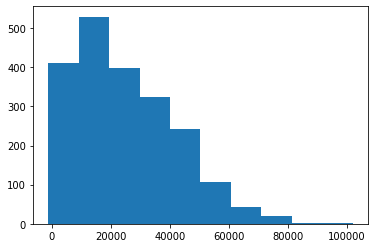

In [11]:
plt.hist(rescale_labels(original_labels, predictions))

In [12]:
np.mean(rescaled_rms)

10548.645926547604